In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [9]:
train=pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
def clean(train):
    train = train.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        train[col].fillna(train[col].median(), inplace=True)
    
    train.Embarked.fillna("U", inplace=True)
    return train

train = clean(train)

KeyError: "['Ticket' 'Cabin' 'Name' 'PassengerId'] not found in axis"

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transformation(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)

data.head(5)

In [3]:
test=pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
only=train.loc[:,["Survived", "Pclass", "Age", "Sex"]]
only

,Survived,Pclass,Age,Sex
0,0,3,22.0,male
1,1,1,38.0,female
2,1,3,26.0,female
3,1,1,35.0,female
4,0,3,35.0,male
...,...,...,...,...
886,0,2,27.0,male
887,1,1,19.0,female
888,0,3,NaN,female
889,1,1,26.0,male


In [5]:
# only showing the columns where survived=1
#maybe  not required. Focus on only one variable

onlysurvived=only[only["Survived"]==1]
onlysurvived

,Survived,Pclass,Age,Sex
1,1,1,38.0,female
2,1,3,26.0,female
3,1,1,35.0,female
8,1,3,27.0,female
9,1,2,14.0,female
...,...,...,...,...
875,1,3,15.0,female
879,1,1,56.0,female
880,1,2,25.0,female
887,1,1,19.0,female


In [6]:
# Use seaborn to create a simple heatmap to see where the missing data is

# ??? how to fill in the missing data

only.isnull()

#True is null or missing data

,Survived,Pclass,Age,Sex
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,False,False,True,False
889,False,False,False,False


In [7]:

only.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [8]:
# this summarizes all the columns (numeric only)

only.describe(include='all')

,Survived,Pclass,Age,Sex
count,891.000000,891.000000,714.000000,891
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,male
freq,NaN,NaN,NaN,577
mean,0.383838,2.308642,29.699118,NaN
std,0.486592,0.836071,14.526497,NaN
min,0.000000,1.000000,0.420000,NaN
25%,0.000000,2.000000,20.125000,NaN
50%,0.000000,3.000000,28.000000,NaN
75%,1.000000,3.000000,38.000000,NaN


In [9]:
only.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# this summarizes all the columns (numeric)

test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Astor, Col. John Jacob",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [12]:
only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Sex       891 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [13]:
only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Sex       891 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
train.shape[0]

891

In [17]:
test.shape[0]

418

In [18]:
train.shape[1]

12

In [19]:
test.shape[1]

11

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [23]:
test.index

RangeIndex(start=0, stop=418, step=1)

In [24]:
# gives the total number of passengers, as in line [14]

train.Survived.count()

891

In [25]:
# 1- number of people survived

train["Survived"].value_counts().head()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
train.Sex.count()

891

In [27]:
train["Sex"].value_counts().head()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
len(train)

891

In [29]:
class1 = train.loc[train.Pclass == 1]["Survived"]
rate_class1 = round(sum(class1)/len(class1)*100,2)

print("Percent of first class who survived: %", rate_class1)

Percent of first class who survived: % 62.96


In [30]:
class2 = train.loc[train.Pclass == 2]["Survived"]
rate_class2 = round(sum(class2)/len(class2)*100,2)

print("Percent of second class who survived: %", rate_class2)

Percent of second class who survived: % 47.28


In [31]:
class3 = train.loc[train.Pclass == 3]["Survived"]
rate_class3 = round(sum(class3)/len(class3)*100,2)                    # not sure if corrrect, len(train)??

print("Percent of third class who survived: %", rate_class3)

Percent of third class who survived: % 24.24


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survivors by Ticket Class')

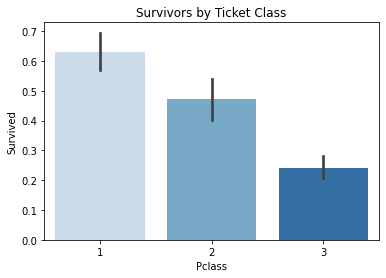

In [32]:
sns.barplot( train["Pclass"], train["Survived"], palette= "Blues",data=train) 
plt.title("Survivors by Ticket Class")

In [33]:
women = train.loc[train.Sex == 'female']["Survived"]

rate_women = round(sum(women)/len(women)*100,2)

print("Percent of women who survived: %", rate_women)

Percent of women who survived: % 74.2


In [34]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = round(sum(men)/len(men)*100,2)

print("Percent of men who survived: %", rate_men)

Percent of men who survived: % 18.89


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survivors by Sex')

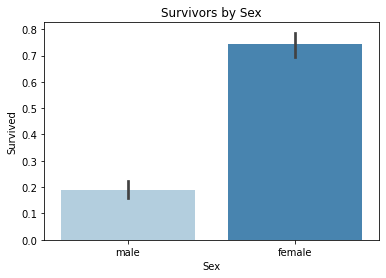

In [35]:
sns.barplot( train["Sex"], train["Survived"], palette="Blues", data=train)
plt.title("Survivors by Sex")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Passengers by Age'}, xlabel='Age', ylabel='Survived'>

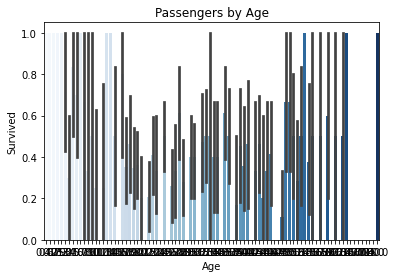

In [36]:
#Ericka & Liz
plt.title("Passengers by Age")

sns.barplot( train["Age"], train["Survived"], palette = "Blues", data = train) 

In [37]:
#Ericka
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Survivors by Age'}, xlabel='Age', ylabel='Survived'>

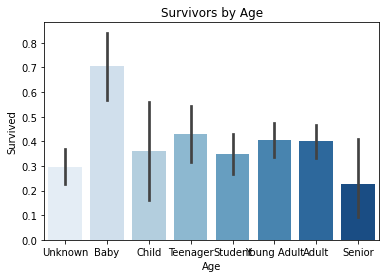

In [38]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['Age'] = pd.cut(train["Age"], bins, labels = labels)
test['Age'] = pd.cut(test["Age"], bins, labels = labels)
plt.title("Survivors by Age")

sns.barplot( train["Age"], train["Survived"], palette = "Blues", data=train) 

In [39]:
#Ericka
allsurvivors=train[train["Survived"]==1]
del allsurvivors["Survived"]
allsurvivors.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,53.1000,C123,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,30.0708,NaN,C


In [40]:
#Ericka
allsurvivors["Age"].describe()

count             342
unique              8
top       Young Adult
freq               89
Name: Age, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'No Survivors by Age'}, xlabel='Age', ylabel='Survived'>

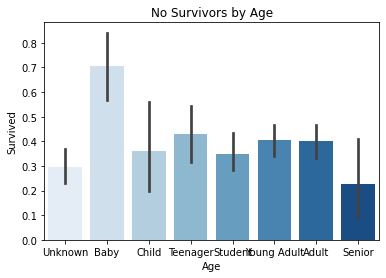

In [41]:
#Ericka & Liz
plt.title("No Survivors by Age")

sns.barplot( train["Age"], train["Survived"], palette = "Blues", data=train) 

In [42]:
#Ericka
nosurvivors=train[train["Survived"]==0]
del nosurvivors["Survived"]
nosurvivors.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,7.2500,NaN,S
4,5,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,Unknown,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,Baby,3,1,349909,21.0750,NaN,S


In [43]:
#Ericka
nosurvivors["Age"].describe()

count             549
unique              8
top       Young Adult
freq              131
Name: Age, dtype: object

In [44]:
only2=onlysurvived.loc[:,["Sex", "Survived", "Pclass", "Age"]]
only2

,Sex,Survived,Pclass,Age
1,female,1,1,38.0
2,female,1,3,26.0
3,female,1,1,35.0
8,female,1,3,27.0
9,female,1,2,14.0
...,...,...,...,...
875,female,1,3,15.0
879,female,1,1,56.0
880,female,1,2,25.0
887,female,1,1,19.0


<AxesSubplot:title={'center':'Training Dataset Correlational Heatmap'}>

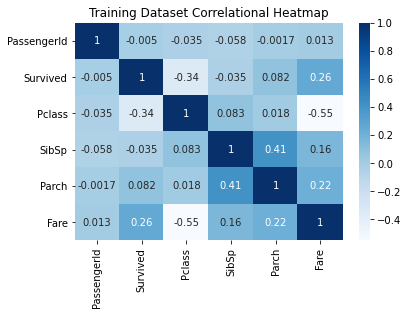

In [45]:
#Ericka
corr = train.corr()
plt.title("Training Dataset Correlational Heatmap")
sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'Select Variable Correlational Heatmap'}>

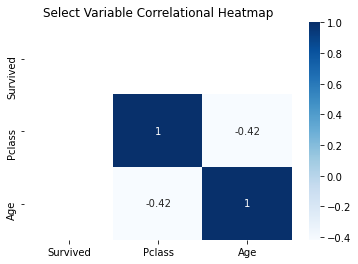

In [46]:
#Ericka
#correlation between all survivors age and class
corr = onlysurvived.corr()
#del onlysurvived["Survived"]
plt.title("Select Variable Correlational Heatmap")
sns.heatmap(corr, cmap="Blues", annot=True)

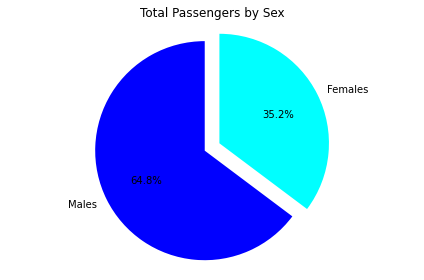

In [47]:
#Ericka
males = (train['Sex'] == 'male').sum()
females = (train['Sex'] == 'female').sum()

proportions = [males, females]

# Create a pie chart
plt.pie(
    proportions,
    
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','cyan'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Total Passengers by Sex")

# View the plot
plt.tight_layout()
plt.show()

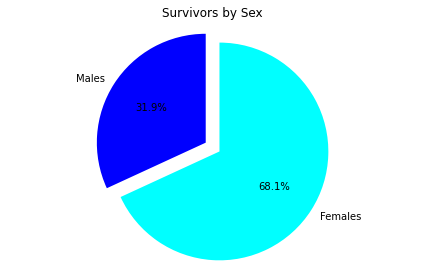

In [48]:
#Ericka
males = (onlysurvived['Sex'] == 'male').sum()
females = (onlysurvived['Sex'] == 'female').sum()

proportions = [males, females]

# Create a pie chart
plt.pie(
    proportions,
    
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','cyan'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Survivors by Sex")

# View the plot
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Survivors Correlational Heatmap'}>

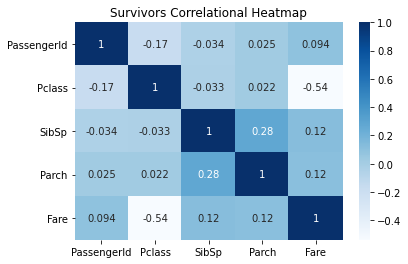

In [49]:
#Ericka
corr = allsurvivors.corr()
plt.title("Survivors Correlational Heatmap")
sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:title={'center':'No Survivors Correlational Heatmap'}>

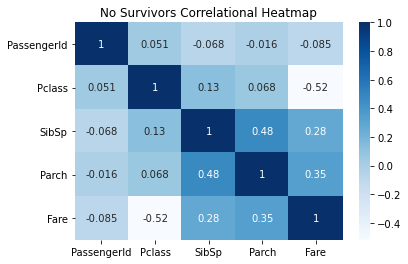

In [50]:
#Ericka
corr = nosurvivors.corr()
plt.title("No Survivors Correlational Heatmap")
sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:>

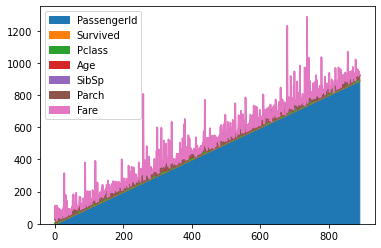

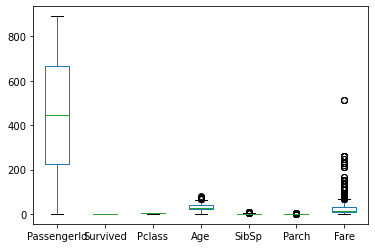

In [51]:
train=pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/train.csv')

#Area plot
train.plot.area()
#Box plot
train.plot.box()

<AxesSubplot:>

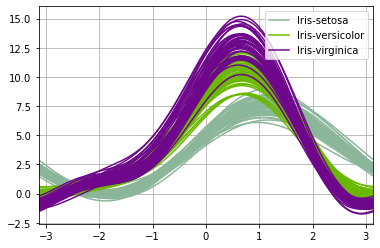

In [52]:
from pandas.plotting import parallel_coordinates

df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/main/pandas/tests/io/data/csv/iris.csv'
)
pd.plotting.andrews_curves(df, 'Name')

In [ ]:
train['Age'].astype(float)
display(train.dtypes) 
train.head()

In [65]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()

fig = figure(plot_width=400, plot_height=400, title="Disposition vs Weight")

fig.square(
           x=train["Age"],
           y=train["Survivors"],
           size=square_sizes, alpha=0.5,
           line_color="orange", fill_color="orange"
        )

fig.xaxis.axis_label="Disposition"
fig.yaxis.axis_label="Weight"

show(fig)

Loading BokehJS ...

KeyError: 'Survivors'

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()

fig = figure(title='My Tutorial Progress',
             plot_height=400, plot_width=700,
             x_axis_label='Age', y_axis_label='Survivors',
             x_minor_ticks=2, y_range=(0, 6000)
            )

fig.vbar(x = train, bottom=0, 
         color='blue', width=0.75, 
         )

show(fig)

In [ ]:
train =pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/train.csv')

pd.plotting.andrews_curves(train_Name)

In [67]:
train['Age'].astype(float)
display(train.dtypes) 
train.head()

from pandas.plotting import parallel_coordinates

train=pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/train.csv')

plt.figure();

parallel_coordinates(int(train), 'Age');


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
#Combining testing and training data

train_test = [train, test]

In [ ]:
# Changing sex to numbers for computation purposes later
#Aus

for dataset in train_test:
    dataset["Sex"] = dataset["Sex"].map({'female': 1, 'male': 0}).astype(int)

In [ ]:
# Note how sex is either 0 or 1 in the output
train.head()

In [ ]:
#Adding random ages for null age

for dataset in train_test:
    #basic data collection
    average_age = dataset["Age"].mean()
    std_age = dataset["Age"].std()
    null_count = dataset["Age"].isnull().count()
    
    #calculation
    null_random_fill = np.random.randint(average_age - std_age, average_age + std_age, size=null_count)
    # Data fill in
    dataset["Age"][np.isnan(dataset["Age"])] = null_random_fill
    dataset["Age"] = dataset["Age"].astype(int)

#Establishing age bins for grouping
train["AgeBin"] = pd.cut(train["Age"], 5)

print(train[["AgeBin", "Survived"]].groupby(["AgeBin"], as_index=False).mean())

In [ ]:
#Establishing age bins

for dataset in train_test:
    dataset.loc[ dataset["Age"] <= 13, "Age"] = 0
    dataset.loc[ (dataset["Age"] > 13) & (dataset["Age"] <= 27), "Age"] = 1
    dataset.loc[ (dataset["Age"] > 27) & (dataset["Age"] <= 40), "Age"] = 2
    dataset.loc[ (dataset["Age"] > 40) & (dataset["Age"] <= 53), "Age"] = 3
    dataset.loc[ (dataset["Age"] > 53) & (dataset["Age"] <= 67), "Age"] = 4
    dataset.loc[ dataset["Age"] > 67, "Age"] = 5

In [ ]:
train.head()

In [ ]:
#Eliminating features for predictions
dropped_feat = ["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
train_dropped = train.drop(dropped_feat, axis=1)
test_dropped = test.drop(dropped_feat, axis=1)

train_dropped = train_dropped.drop(["PassengerId", "AgeBin"],axis=1)

In [ ]:
#Establishing data for predictions

x_training = train_dropped.drop("Survived", axis=1)
y_training = train_dropped["Survived"]
x_testing = test_dropped.drop ("PassengerId", axis=1).copy()

x_training.shape, y_training.shape, x_testing.shape

In [ ]:
eq = LogisticRegression()
eq.fit(x_training,y_training)
logistic_reg = eq.predict(x_testing)
final_log_reg = round( eq.score(x_training, y_training) * 100, 2)
print(str(final_log_reg) + " percent")

In [ ]:
Data_submission_format = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": logistic_reg})

In [ ]:
Data_submission_format
